# Nbody simulation

Get Acceleration:

## Energy:

Main simulation:

In [2]:
import matplotlib.animation as animation 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [41]:
plt.style.use('dark_background')

"""
Create Your Own N-body Simulation (With Python)
Philip Mocz (2020) Princeton Univeristy, @PMocz
Simulate orbits of stars interacting due to gravity
Code calculates pairwise forces according to Newton's Law of Gravity
"""

def getAcc( pos, mass, G, softening ):
	"""
    Calculate the acceleration on each particle due to Newton's Law 
	pos  is an N x 3 matrix of positions
	mass is an N x 1 vector of masses
	G is Newton's Gravitational constant
	softening is the softening length
	a is N x 3 matrix of accelerations
	"""
	# positions r = [x,y,z] for all particles
	x = pos[:,0:1]
	y = pos[:,1:2]
	z = pos[:,2:3]

	# matrix that stores all pairwise particle separations: r_j - r_i
	dx = x.T - x
	dy = y.T - y
	dz = z.T - z

	# matrix that stores 1/r^3 for all particle pairwise particle separations 
	inv_r3 = (dx**2 + dy**2 + dz**2 + softening**2)
	inv_r3[inv_r3>0] = inv_r3[inv_r3>0]**(-1.5)

	ax = G * (dx * inv_r3) @ mass
	ay = G * (dy * inv_r3) @ mass
	az = G * (dz * inv_r3) @ mass
	
	# pack together the acceleration components
	a = np.hstack((ax,ay,az))

	return a

def main_pyplot_animation():
	""" N-body simulation """
	
	# Simulation parameters
	N         = 200    # Number of particles
	t         = 0      # current time of the simulation
	tEnd      = 10.0   # time at which simulation ends
	dt        = 0.1   # timestep
	softening = 0.1   # softening length
	G         = 1  # Newton's Gravitational Constant
	plotRealTime = True # switch on for plotting as the simulation goes along
	
	# Generate Initial Conditions

	np.random.seed(20)            # set the random number generator seed
	
	mass = -20.0*np.ones((N,1))/N  # total mass of particles is 20
	pos  = np.random.randn(N,3)   # randomly selected positions and velocities
	vel  = np.random.randn(N,3)


	# Convert to Center-of-Mass frame
	vel -= np.mean(mass * vel,0) / np.mean(mass)
	
	# calculate initial gravitational accelerations
	acc = getAcc( pos, mass, G, softening )
		
	# number of timesteps
	Nt = int(np.ceil(tEnd/dt))
	
	# save energies, particle orbits for plotting trails
	pos_save = np.zeros((N,3,Nt+1))
	pos_save[:,:,0] = pos


	# prep figure
	fig = plt.figure(figsize=(1,2), dpi=80)
	grid = plt.GridSpec(3, 1, wspace=0.0, hspace=0.3)
	ax = plt.subplot(grid[0:10,0])
	line, = ax.plot([], [], lw=3)

	q = 0	
	# Simulation Main Loop
	for i in range(Nt):
		# (1/2) kick
		vel += acc * dt/2.0
		
		# drift
		pos += vel * dt
		
		# update accelerations
		acc = getAcc( pos, mass, G, softening )
		
		# (1/2) kick
		vel += acc * dt/2.0
		
		# update time
		t += dt		
		
		# save energies, positions for plotting trail
		pos_save[:,:,i+1] = pos
		
		
		if plotRealTime or (i == Nt-1):
			plt.cla()

			
			

			ax.set_aspect('equal', 'box')
			plt.xlim([-20, 20])
			plt.ylim([-20, 20])
			
			xx = pos_save[:,0,max(i-50,0):i+1]
			yy = pos_save[:,1,max(i-50,0):i+1]

			plt.scatter(xx, yy, s=1/5, color=[.7,.7,1], alpha=0.25)
			plt.scatter(pos[:,0], pos[:,1], 'ColorVariable','Diastolic', s=1, alpha=0.8)

			
			#plt.savefig(f"nbody6_{q}.png", format=None)
			q += 1
			
			plt.pause(0.00001)
	    

	
	# Save figure
	plt.show()
	
	return 0
#clear_output()

TypeError: scatter() got multiple values for argument 's'

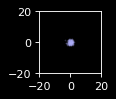

In [42]:
main_pyplot_animation()